In [1]:
import pandas as pd
import numpy as np
import kaggle as kg
import os
import matplotlib.pyplot as plt

In [ ]:
os.environ["USERNAME"] = "<your kaggle user name>"
os.environ["KEY"] = "<your kaggle api key from kaggle.json file stored at ~/.kaggle"

In [2]:
kg.api.authenticate()

In [6]:
kg.api.dataset_download_files(dataset="eslamelsolya/laptop-price-prediction",
                              path="dataset",unzip=True)

Dataset URL: https://www.kaggle.com/datasets/eslamelsolya/laptop-price-prediction


In [4]:
data = pd.read_csv("dataset/laptop_data.csv")

In [5]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
data.shape

(1303, 12)

In [7]:
data.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [8]:
data.shape

(1303, 11)

In [9]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
def ordinal_encode_column(column_name):

    groupby_colname = data.groupby(by=column_name)["Price"].mean()
    groupby_colname = groupby_colname.sort_values()
    colname2idx = dict(zip(groupby_colname.index,list(range(len(groupby_colname)))))
    data[column_name] = data[column_name].map(colname2idx)

In [11]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [12]:
ordinal_encode_column(data.columns[0])
ordinal_encode_column(data.columns[1])
ordinal_encode_column(data.columns[3])
ordinal_encode_column(data.columns[4])
ordinal_encode_column(data.columns[6])
ordinal_encode_column(data.columns[7])

In [13]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,13,3,13.3,26,85,8GB,13,80,macOS,1.37kg,71378.6832
1,13,3,13.3,13,64,8GB,14,45,macOS,1.34kg,47895.5232
2,5,1,15.6,15,58,8GB,20,54,No OS,1.86kg,30636.0000
3,13,3,15.4,36,111,16GB,30,95,macOS,1.83kg,135195.3360
4,13,3,13.3,26,99,8GB,20,84,macOS,1.37kg,96095.8080


In [14]:
data[data.columns[8]].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [15]:
os_ohe = pd.crosstab(index=data.index,columns=data[data.columns[8]])

In [16]:
os_ohe

OpSys,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
row_0,,,,,,,,,
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,1,0,0,0
1299,0,0,0,0,0,1,0,0,0
1300,0,0,0,0,0,1,0,0,0


In [17]:
data.drop(labels=data.columns[8],inplace=True,axis=1)

In [18]:
y = data["Price"]
X = data.iloc[:,0:9]

In [19]:
X = pd.concat((X,os_ohe),axis=1)

In [20]:
X

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13,3,13.3,26,85,8GB,13,80,1.37kg,0,0,0,0,0,0,0,0,1
1,13,3,13.3,13,64,8GB,14,45,1.34kg,0,0,0,0,0,0,0,0,1
2,5,1,15.6,15,58,8GB,20,54,1.86kg,0,0,0,0,1,0,0,0,0
3,13,3,15.4,36,111,16GB,30,95,1.83kg,0,0,0,0,0,0,0,0,1
4,13,3,13.3,26,99,8GB,20,84,1.37kg,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,6,2,14.0,16,77,4GB,13,47,1.8kg,0,0,0,0,0,1,0,0,0
1299,6,2,13.3,22,77,16GB,30,47,1.3kg,0,0,0,0,0,1,0,0,0
1300,6,1,14.0,6,16,2GB,6,6,1.5kg,0,0,0,0,0,1,0,0,0
1301,5,1,15.6,6,77,6GB,12,32,2.19kg,0,0,0,0,0,1,0,0,0


In [21]:
X[X.columns[5]] = X[X.columns[5]].apply(lambda x: int(x.split("GB")[0]))

In [22]:
X.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13,3,13.3,26,85,8,13,80,1.37kg,0,0,0,0,0,0,0,0,1
1,13,3,13.3,13,64,8,14,45,1.34kg,0,0,0,0,0,0,0,0,1
2,5,1,15.6,15,58,8,20,54,1.86kg,0,0,0,0,1,0,0,0,0
3,13,3,15.4,36,111,16,30,95,1.83kg,0,0,0,0,0,0,0,0,1
4,13,3,13.3,26,99,8,20,84,1.37kg,0,0,0,0,0,0,0,0,1


In [23]:
X[X.columns[8]] = X[X.columns[8]].apply(lambda x: float(x.split("kg")[0]))

In [24]:
X.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13,3,13.3,26,85,8,13,80,1.37,0,0,0,0,0,0,0,0,1
1,13,3,13.3,13,64,8,14,45,1.34,0,0,0,0,0,0,0,0,1
2,5,1,15.6,15,58,8,20,54,1.86,0,0,0,0,1,0,0,0,0
3,13,3,15.4,36,111,16,30,95,1.83,0,0,0,0,0,0,0,0,1
4,13,3,13.3,26,99,8,20,84,1.37,0,0,0,0,0,0,0,0,1


In [25]:
X = np.array(X)
y = np.array(y)
y = y.reshape(y.shape[0],1)

In [26]:
X = (X - np.mean(X,axis=0))/np.std(X,axis=0)

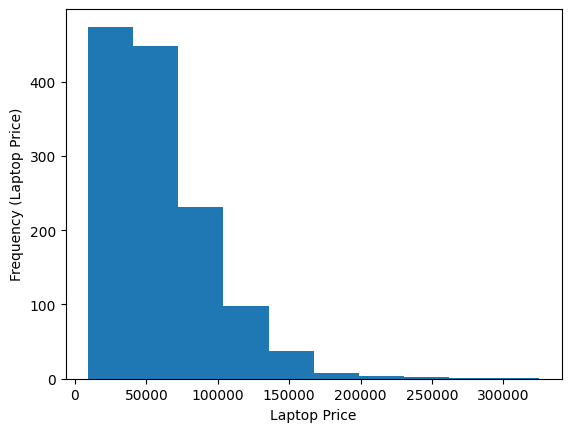

In [37]:
plt.xlabel("Laptop Price")
plt.ylabel("Frequency (Laptop Price)")
axes = plt.hist(y)
x_axis = axes[1]
y_axis = axes[0]

(array([ 19.,  76., 151., 191., 261., 270., 216.,  98.,  17.,   4.]),
 array([ 9.13461633,  9.49029881,  9.84598129, 10.20166377, 10.55734625,
        10.91302873, 11.26871121, 11.62439369, 11.98007617, 12.33575865,
        12.69144113]),
 <BarContainer object of 10 artists>)

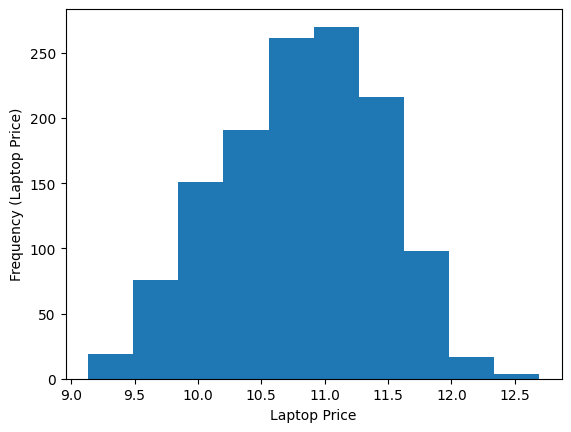

In [44]:
y = np.log(y)
plt.xlabel("Laptop Price")
plt.ylabel("Frequency (Laptop Price)")
plt.hist(y)

In [46]:
def del_by_del_w(w0,w_vec):

    del_by_del_w0 = (-2/y.shape[0])*np.sum(y - (w0 + np.matmul(X,w_vec)))
    del_by_del_w_vec = (-2/y.shape[0])*np.matmul((y - (w0 + np.matmul(X,w_vec))).T,X).T

    return [del_by_del_w0, del_by_del_w_vec]

In [47]:
w0_initial = 0
w_vec_initial = np.zeros((18,1))
epsilon = 10**(-3)

while True:

    del_by_dels = del_by_del_w(w0_initial,w_vec_initial)
    break